In [370]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display
%pylab inline
# The imports listed above contain numpy and pandas for data analysis

Populating the interactive namespace from numpy and matplotlib


In [371]:
filename = '/Users/aliciadale/Downloads/train.csv'
train_df = pd.read_csv(filename)
# code aboves uses pandas pd to read the CSV file that is being accessed from the above line of code

In [372]:
if True: 
    print train_df 
    # The 'print' statement showcases that the correct data frame is chosen and printed below the code

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

###### The main question that I have regarding this data set is what factors contributed to survival rate? Gender, Pclass, or even port at which passengers had embarked on their journey from. Which variables contribute to highest survival rates?

###### Before I begin to analyze the data I have noticed in the CSV file that some content seems to be missing from the data. I would like to see just how much is missing before I begin my analysis by counting how many missing values are present in all categories of the data set. 

In [373]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print train_df.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print train_df.apply(num_missing, axis=1)#.head() #axis=1 defines that function is to be applied on each row

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values per row:
0      1
1      0
2      1
3      0
4      1
5      2
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     2
18     1
19     2
20     1
21     0
22     1
23     0
24     1
25     1
26     2
27     0
28     2
29     2
      ..
861    1
862    0
863    2
864    1
865    1
866    1
867    0
868    2
869    1
870    1
871    0
872    0
873    1
874    1
875    1
876    1
877    1
878    2
879    0
880    1
881    1
882    1
883    1
884    1
885    1
886    1
887    0
888    2
889    0
890    1
dtype: int64


###### Since the display above is a little broad, I decided to create new columns with more descriptive labels. Below is the code for that. 

In [374]:
# Create Survival Label Column
train_df['Survival'] = train_df.Survived.map({0 : 'Died', 1 : 'Survived'})
train_df.Survival
# Passenger Id is on the left and Survived/Died is on the right 

0          Died
1      Survived
2      Survived
3      Survived
4          Died
5          Died
6          Died
7          Died
8      Survived
9      Survived
10     Survived
11     Survived
12         Died
13         Died
14         Died
15     Survived
16         Died
17     Survived
18         Died
19     Survived
20         Died
21     Survived
22     Survived
23     Survived
24         Died
25     Survived
26         Died
27         Died
28     Survived
29         Died
         ...   
861        Died
862    Survived
863        Died
864        Died
865    Survived
866    Survived
867        Died
868        Died
869    Survived
870        Died
871    Survived
872        Died
873        Died
874    Survived
875    Survived
876        Died
877        Died
878        Died
879    Survived
880    Survived
881        Died
882        Died
883        Died
884        Died
885        Died
886        Died
887    Survived
888        Died
889    Survived
890        Died
Name: Survival, dtype: o

In [375]:
# Create Pclass Label Column
train_df['Class'] = train_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
train_df.Class

0       Third Class
1       First Class
2       Third Class
3       First Class
4       Third Class
5       Third Class
6       First Class
7       Third Class
8       Third Class
9      Second Class
10      Third Class
11      First Class
12      Third Class
13      Third Class
14      Third Class
15     Second Class
16      Third Class
17     Second Class
18      Third Class
19      Third Class
20     Second Class
21     Second Class
22      Third Class
23      First Class
24      Third Class
25      Third Class
26      Third Class
27      First Class
28      Third Class
29      Third Class
           ...     
861    Second Class
862     First Class
863     Third Class
864    Second Class
865    Second Class
866    Second Class
867     First Class
868     Third Class
869     Third Class
870     Third Class
871     First Class
872     First Class
873     Third Class
874    Second Class
875     Third Class
876     Third Class
877     Third Class
878     Third Class
879     First Class


In [401]:
###### Create Embarked Labels Column
train_df['Ports'] =train_df .Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
train_df.Ports

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
5       Queenstown
6      Southampton
7      Southampton
8      Southampton
9        Cherbourg
10     Southampton
11     Southampton
12     Southampton
13     Southampton
14     Southampton
15     Southampton
16      Queenstown
17     Southampton
18     Southampton
19       Cherbourg
20     Southampton
21     Southampton
22      Queenstown
23     Southampton
24     Southampton
25     Southampton
26       Cherbourg
27     Southampton
28      Queenstown
29     Southampton
          ...     
861    Southampton
862    Southampton
863    Southampton
864    Southampton
865    Southampton
866      Cherbourg
867    Southampton
868    Southampton
869    Southampton
870    Southampton
871    Southampton
872    Southampton
873    Southampton
874      Cherbourg
875      Cherbourg
876    Southampton
877    Southampton
878    Southampton
879      Cherbourg
880    Southampton
881    Southampton
882    South

The missing values from the data set will not show up in groupby() funtion using pandas so it will not interrupt my pandas series that is populated or my matplotlib graphs since Matplotlib implicitly joins the last contiguous data point to the next one. Missing values can exist due to loss of data, or any type of error in documenting. Which in this case their could be a lot more reasons why the data may be missing. But for now, I will just continue my analysis with the information that is available to use.

There are a few ways that I can deal with the missing values. 
I could ignore it - Just leave it there(wouldnt showcase accurate data points)
Delete it - Remove all cases. Remove from data entirely. This means forfeiting the entire row of data.(leave me with even less data since the cabin column has so much missing data)
Fill forward or backwards - This means taking the prior or following value and just filling it in.
Replace it with something static - For example, replacing all NaN data with -9999.
 
I decided to conduct my analysis on data that had either no missing values or just a few missing values. The only data that I chose to use that had missing values was Embarked. While conducting my analysis I kept that in mind and handled the data accordingly. 
 
## Below is the beginning of my analysis! 

### How many males vs females survived the Titanic disaster?
I'm interested in seeing if women were rescued before men on the Titanic which would result in higher female survival rates. I decided to conduct an analysis and find columns that would be relevant in finding my answer from information that the data provides. I decided to use groupby(), function from pandas library to pull the necessary content. Then stack it in a simple table, then create a visualization for the data. 

In [377]:
gender = train_df.groupby(['Sex', 'Survived'])['PassengerId'].count()
gender.unstack(level=1)

Survived,0,1
Sex,,
female,81,233
male,468,109


#### This series showcases the amount of survived and non survived. 
0 = did not survive  
1 = yes did survive 

The visualization below showcases female and male survival rates for the Titanic.
Chart showcases that more males had passed overall, and more females had lived. Indicated that the females were rescued before the males, proving the first question in my case of survival rates to be true.I created another graph to also showcase my point with another visualization with the same data just shown differently. The swarmplot shows just how many people survived and did not in a way that showcases just how many more males were present on the Titanic ship and shows just how many males died in comparison to the even lower count of females that were present but had such a higher survival count. Below the graphs I conducted some mathematical calculations that support my analysis.  

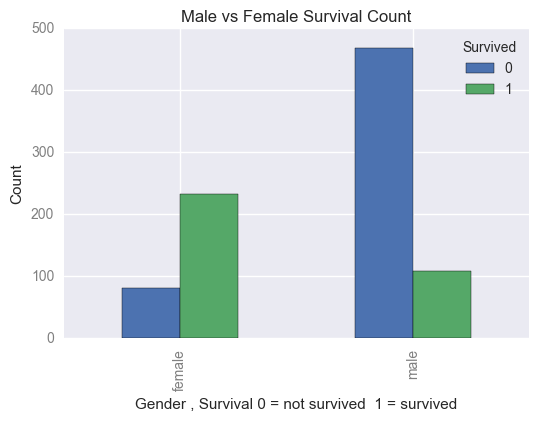

In [378]:
survival_gender = gender.unstack(level=1).plot(kind='bar',title="Male vs Female Survival Count" )
survival_gender.set_ylabel('Count')
survival_gender.set_xlabel("Gender , Survival 0 = not survived  1 = survived")
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')



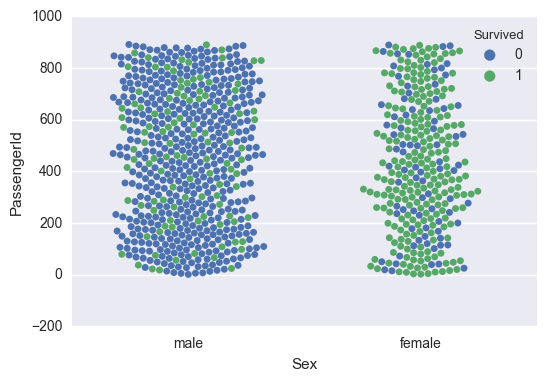

In [424]:
sns.swarmplot(x="Sex", y="PassengerId", hue="Survived", data=train_df)

#### Calculate percentage of male vs female survival rates for further analysis.

In [379]:
train_df.groupby('Sex') ['Survived'].value_counts(normalize = True)*100

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

#### Calculating exact percentage as shown above displays just how much the percentage differs from male to female. 

### How many of each Pclass(socioeconomic status) survived the Titanic categorized by gender? 

     1 = first class
     2 = second class
     3 = third class
   I want to find if first class passengers were rescued first in comparison to second and third class passengers. Also if females still had a higher survival count over males for first class if the first statement is true. So I'm conducting analysis to find if female first class passengers had a significant higher rate of survival over other classes and male gender. But before I find who survived I would like to see how many were on the Titanic to begin with. Below is that analysis of total passengers in each category of Pclass and gender based on the data given in the train_df. 

In [380]:
gender_class = train_df.groupby(['Pclass','Sex'])['PassengerId'].count()
gender_class
#shows a pandas series that shows how many female and male passengers of each class were present on Titanic before 
#accident happened

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64

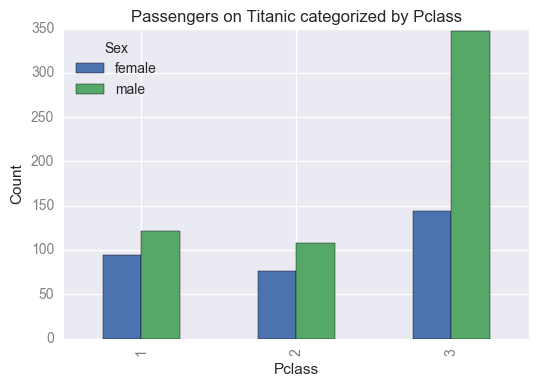

In [381]:
gender_class.unstack(level = 1).plot(kind='bar', title='Passengers on Titanic categorized by Pclass')
plt.ylabel('Count')
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

# This series showcases how many male and female of each class were present on the Titanic
# Also shows there were way more male in pclass three overall

###### This bar graph shows that female and male counts for class 1, and 2 dont differ greatly. For third class passengers there are a lot more males present. I want to find if that large amount of third class males had a significant rate of survival. I would think that female first class would have the majority of the survival rate, based on my previous analysis where females showed over double the rate of survival over males. But also if females had a higher survival rate over all classes or maybe just two. But lets dig deeper and find if that is true. 


Here I will conduct my analysis to see if female first class passengers had a significant survival count over the majority of the third class passengers, which are mostly male, but hold the highest count of passengers overall. Also if females still had the highest survival rate in all classes. 

In [382]:
survival_pclass = train_df.groupby(['Pclass', 'Sex']) ['Survived'].sum()
survival_pclass
#The series below shows how many of each pclass survived categorized by gender

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

###### To create a mathematical representation I decided to calculate percentage values for each class based on gender. 

In [383]:
#Calculate percentage rate of survival for each Pclass seperated by male and female. 
perc_pclass = train_df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize = True)*100
perc_pclass

Pclass  Sex     Survived
1       female  1           96.808511
                0            3.191489
        male    0           63.114754
                1           36.885246
2       female  1           92.105263
                0            7.894737
        male    0           84.259259
                1           15.740741
3       female  0           50.000000
                1           50.000000
        male    0           86.455331
                1           13.544669
Name: Survived, dtype: float64

##### Is there a correlation between Pclass, Gender and end Survival rate of passengers on the Titanic? Did first class have higher survival rate than second and third? And more importantly did females have higher rates of survival in ALL categories as welll as the overall percentage rate of sruvival. 

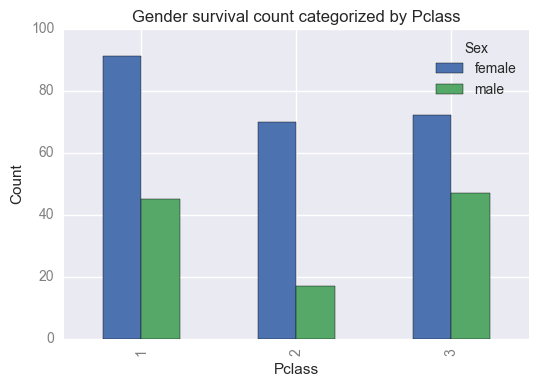

In [384]:
survival_pclass.unstack(level = 1).plot(kind='bar', title='Gender survival count categorized by Pclass')
plt.ylabel('Count')
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

###### The graph actually showcases that over each Pclass more females had survived in comparison to the males on board the Titanic. So there are no Pclasses that show any significance against the claim that females had a higher survival rate. Over all Pclasses the females had a higher survival rate over males as well in the overall analysis of males and females. Showing that females in all classes were rescued first over any males. When it comes to male survival rates, first and third class had the highest rates of survival, where second class males fell last. 


###  Where did each Pclass come from? What was their port of embarkation (C,Q, or S) ?
Let's see if socioeconomic status has a correlation with the port of embarkation. Lets see how many passengers came from each port. In this analysis each port is identified by a letter as listed below:
C = Cherbourg 
Q = Queenstown 
S = Southhampton

In [400]:
port = train_df.groupby('Embarked')['PassengerId'].count()
port

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

###### The table above showcases how many passengers embarked from each port. But when adding all the counts together the sum only comes to 889....what happened to the rest of the passengers? There are 891 total as displayed with the code below. Groupby() function excluded the NAN values from the data set. So we are going to creat a percentage rate based on how many were actually included in the analysis. 

In [386]:
count_row=train_df.shape[0]
print count_row
#shows how many rows in the data set

891


###### There are 891 passengers but only 889 were listed in the data set with an embark location. Showing that 2 passengers were not listed with an embark location. I will calulate percentages based on how many passengers had an embark location, not by overall total of passengers. 

###### Below I created a plot that showcases that the majority of the passengers came from Southhampton. 

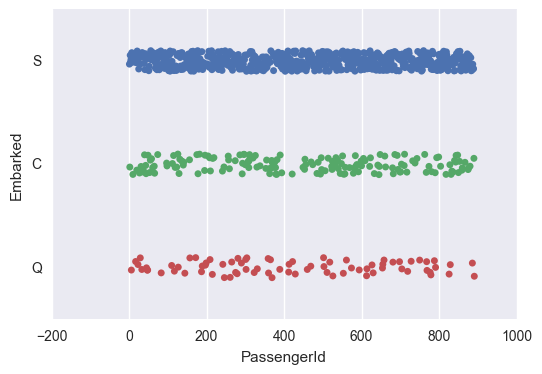

In [387]:
sns.stripplot(x="PassengerId", y="Embarked", data=train_df, jitter=True);

#### The above graph shows where each Pclass departed from either 
C = Cherbourg
Q = Queenstown
S = Southhampton

###### Now that I've found where the majority of passengers came from by port of embarkation, I would like to now see if there seems to be any significant correlation between Pclass and embark port. Maybe then we can dig deeper and see a larger picture for my analysis on survival predicters. See if where passengers embarked from and associate that with Pclass and see if a certain port and pclass had a higher survival count. Or if a certain port had more females over males, which would show that that port had the highest rate of survival. 

###### Based off of the above visualization, looks like most 3rd class passengers came from Queenstown, most 1st class came from Cherbourg, and most 2nd, came from Southhampton. Below I have created a percentage rate for each port to further my analysis. 

In [388]:
#Calculate percentage of passengers per embark location based on Pclass
embark_class_perc = train_df.groupby('Embarked')['Pclass'].value_counts(normalize = True)*100
embark_class_perc

Embarked  Pclass
C         1         50.595238
          3         39.285714
          2         10.119048
Q         3         93.506494
          2          3.896104
          1          2.597403
S         3         54.813665
          2         25.465839
          1         19.720497
Name: Pclass, dtype: float64

###### The majority of the passengers overall came from Southhampton and the majority of pclass 3 also came from Southhampton port. Showcasing that the majority of 3rd class passengers must have lived around Southhampton port. Maybe Southhampton port was a major city, thats why the most passengers and the highest counts for all classes are from there. I would then speculate that Queenstown, and Cherbourg may be smaller, or even more rural towns. 

In [389]:
survive_port= train_df.groupby(['Embarked', 'Survived','Pclass','Sex']) ['PassengerId'].count()
survive_port

Embarked  Survived  Pclass  Sex   
C         0         1       female      1
                            male       25
                    2       male        8
                    3       female      8
                            male       33
          1         1       female     42
                            male       17
                    2       female      7
                            male        2
                    3       female     15
                            male       10
Q         0         1       male        1
                    2       male        1
                    3       female      9
                            male       36
          1         1       female      1
                    2       female      2
                    3       female     24
                            male        3
S         0         1       female      2
                            male       51
                    2       female      6
                            male       82

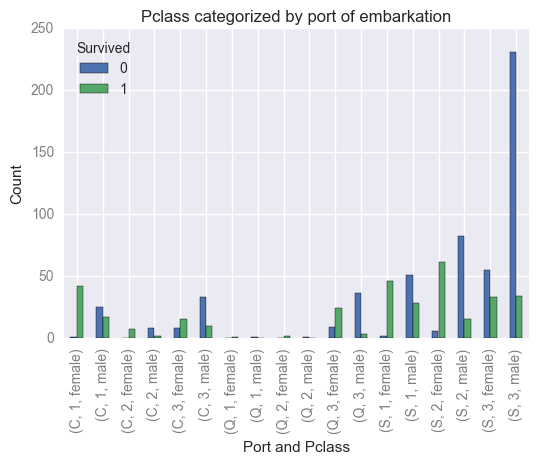

In [390]:
survive_by_port = survive_port.unstack(level=1).plot(kind='bar',title="Pclass categorized by port of embarkation" )
survive_by_port.set_ylabel('Count')
survive_by_port.set_xlabel("Port and Pclass")
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

###### Above you can see that most of the green survival counts are on the right of the graph. Looks like females from Southhampton have highest survival rates. 

###### So far I've found that if you were a woman and from Southhampton port of embarkation you had the highest rate of survival. Now I want to find out if having children greatly impacted your rate of survival as well. 


In [391]:
#Calculate how many passengers had children and how many children they had 
children_count = train_df.groupby('Parch')['Embarked'].count()
children_count

Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
Name: Embarked, dtype: int64

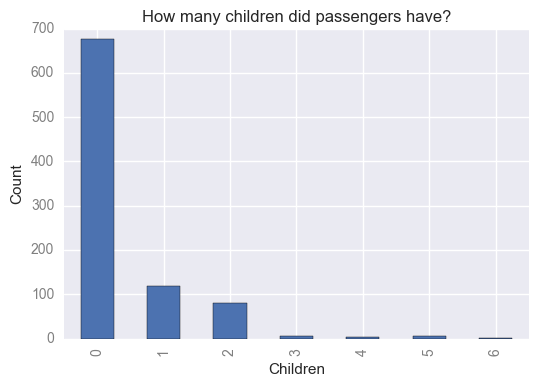

In [392]:
#Create visulualization that coincides with parch information 
children= children_count.plot(kind='bar',title="How many children did passengers have?" )
children.set_ylabel('Count')
children.set_xlabel("Children")
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

Majority of passengers had no children, but did the passangers that had children have higher survival rates? 

In [434]:
child_survive = train_df.groupby(['Parch','Survived']) ['Sex'].count()
child_survive

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Sex, dtype: int64

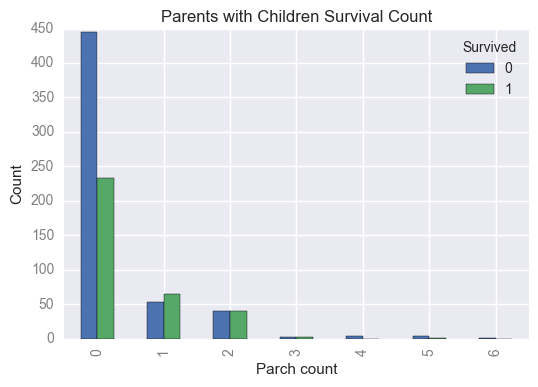

In [436]:
children_survive = child_survive.unstack(level=1).plot(kind='bar',title="Parents with Children Survival Count" )
children_survive.set_ylabel('Count')
children_survive.set_xlabel("Parch count")
ax = plt.gca()
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

###### Here you can clearly see that passengers with children have a higher rate of survival, or at least females. Also females still have higher rate again over every category. So if you wanted to have the highest chance for survival on the Titanic you had to be a woman with children and have come from Southhampton port. 